Adınız: Ceyda

Soyadınız: Metin

Okul Numarası: 2212721025

GitHub Repo Bağlantısı: https://github.com/ceydametinn/CNN_siniflandirma

# CNN Projesi: Kendi Görüntü Veri Setimle Sınıflandırma
## Model 2: Sıfırdan Basit CNN Mimarisi (From Scratch)



---

### 1. Proje ve Modelin Amacı
Bu çalışmanın bu aşamasında (**Model 2**), herhangi bir ön eğitimli model (Transfer Learning) kullanılmadan, tamamen sıfırdan tasarlanan özgün bir **Evrişimli Sinir Ağı (Convolutional Neural Network - CNN)** mimarisi kurulacaktır.

**Neden Sıfırdan Model Eğitiyoruz?**
Model 1 aşamasında kullanılan VGG16 gibi modeller milyonlarca görselle eğitilmiş "uzman" modellerdir. Ancak bu aşamada amacımız:
1.  Derin öğrenme mimarisinin temel yapı taşlarını (Conv2D, MaxPooling, Dense) manuel olarak bir araya getirmek.
2.  Modelin **özellik çıkarımı (feature extraction)** yeteneğini kendi veri setimiz üzerinde sıfırdan gözlemlemek.
3.  Modelin öğrenme sürecini ve performansını, Transfer Learning yöntemiyle karşılaştırmaktır.

**Veri Seti Bilgisi:**
* **Sınıf 1:** Düğmeler
* **Sınıf 2:** Makaralar
* **Eğitim Stratejisi:** Görüntüler 128x128 piksel boyutuna indirgenip normalize edilecek ve modelin bu piksellerdeki desenleri (kenar, köşe, doku) öğrenmesi sağlanacaktır.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from google.colab import drive

# 1. Google Drive'ı Bağlıyoruz
drive.mount('/content/drive')

# 2. Veri Seti Yolu (Senin Drive yolun)
dataset_path = '/content/drive/MyDrive/CNN_Proje/veri_seti'

# Kontrol
if os.path.exists(dataset_path):
    print(f"\n✅ Veri seti yolu doğrulandı: {dataset_path}")
else:
    print("\n❌ HATA: Klasör bulunamadı! Drive yolunu kontrol et.")

Mounted at /content/drive

✅ Veri seti yolu doğrulandı: /content/drive/MyDrive/CNN_Proje/veri_seti


In [2]:
# Veriyi normalize et (0-1 arasına getir) ve %20 validasyon ayır
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Eğitim Seti
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,          # Model 2 için batch 32 standarttır
    class_mode='binary',
    subset='training'
)

# Test/Doğrulama Seti
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


### 2. Model Mimarisi ve Katmanların Görevleri

Modelimiz, görüntü işleme problemlerinde standart olarak kabul edilen **Sıralı (Sequential)** yapıdadır ve iki ana bloktan oluşur:

#### A. Özellik Çıkarımı (Feature Extraction) Bloğu
Görüntüdeki önemli detayları yakalayan kısımdır. 3 aşamalı bir yapı kurulmuştur:
* **Conv2D (Evrişim Katmanı):** Görüntü üzerinde filtreler gezdirerek kenar, köşe ve doku gibi özellikleri tespit eder. ReLU aktivasyon fonksiyonu ile doğrusallık bozularak öğrenme kapasitesi artırılır.
* **MaxPooling2D (Ortaklama Katmanı):** Görüntünün boyutunu yarıya indirir (Downsampling). Bu işlem hem hesaplama maliyetini düşürür hem de modelin "aşırı ezberlemesini" (overfitting) engelleyerek sadece en baskın özellikleri bir sonraki katmana aktarır.

#### B. Sınıflandırma (Classification) Bloğu
Çıkarılan özelliklere bakarak kararın verildiği kısımdır.
* **Flatten:** 2 boyutlu görüntü matrisini, tek boyutlu bir vektöre dönüştürerek yapay sinir ağına hazırlar.
* **Dense (Tam Bağlantılı Katman):** Nöronların birbirine tam bağlı olduğu, öğrenmenin yoğunlaştığı katmandır.
* **Dropout (%50):** Rastgele nöronları kapatarak modelin ezber yapmasını engeller ve genelleme yeteneğini artırır.
* **Output Layer (Çıkış Katmanı):** İkili sınıflandırma (Binary Classification) yapıldığı için, sonucun 0 ile 1 arasında bir olasılık değeri üretmesini sağlayan **Sigmoid** aktivasyon fonksiyonu kullanılmıştır.

In [3]:
model = Sequential()

# 1. Blok
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2. Blok
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. Blok
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Düzleştirme ve Karar
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # Ezberlemeyi önlemek için

# Çıkış
model.add(Dense(1, activation='sigmoid'))

# Derleme
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 77s 16s/step - accuracy: 0.4873 - loss: 0.8728 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.4974 - loss: 0.6986 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.6660 - loss: 0.6774 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.6470 - loss: 0.6522 - val_accuracy: 0.4000 - val_loss: 0.6819
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.6960 - loss: 0.6089 - val_accuracy: 0.7000 - val_loss: 0.6525
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.8433 - loss: 0.4739 - val_accuracy: 0.6500 - val_loss: 0.7408
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.8161 - loss: 0.4407 - val_accuracy: 0.7500 - val_loss: 0.6511
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.7836 - loss: 0.4311 - val_accuracy: 0.6750 - val_loss: 0.6792
Epoch 9

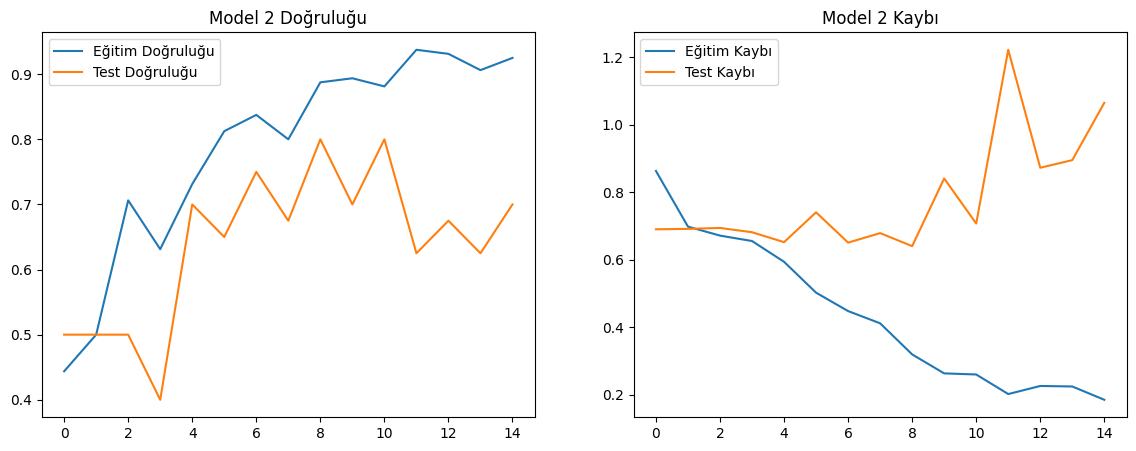

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 606ms/step - accuracy: 0.7063 - loss: 0.9491

--------------------------------------
✅ Model 2 (Basit CNN) Test Başarısı : %70.00
📉 Model 2 (Basit CNN) Test Kaybı    : 1.0651
--------------------------------------


In [5]:
# Grafikler
plt.figure(figsize=(14, 5))

# Doğruluk
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Test Doğruluğu')
plt.title('Model 2 Doğruluğu')
plt.legend()

# Kayıp
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Test Kaybı')
plt.title('Model 2 Kaybı')
plt.legend()

plt.show()

# Final Sonucu Yazdır
test_loss, test_acc = model.evaluate(validation_generator)
print(f"\n--------------------------------------")
print(f"✅ Model 2 (Basit CNN) Test Başarısı : %{test_acc*100:.2f}")
print(f"📉 Model 2 (Basit CNN) Test Kaybı    : {test_loss:.4f}")
print(f"--------------------------------------")